<a href="https://colab.research.google.com/github/sandeep0097-97/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# Project Type - Exploratory Data Analysis (EDA)
# Contribution - Individual
# Name - Amruthala Sireesha

# **https://github.com/sireeshaA09/Play-store-App-Review-Analysis/upload**



# Exploring Play Store Data

In [99]:
# import pandas and numpy
import pandas as pd
import numpy as np

In [100]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
file_path= '/content/drive/MyDrive/Play Store Data (4).csv'
# Instead of using 'reader', use pd.read_csv directly to read the file.
# The 'read_csv' variable is already being used to store the DataFrame,
# so there's no need to create an unnecessary intermediate variable.
psd=pd.read_csv(file_path)
print(psd)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

In [102]:
psd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [103]:
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [104]:
# Total number of rows and columns
psd.shape

(10841, 13)

In [105]:
# Names of all the columns
list(psd.columns)

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

In [106]:
# Total Number of NaN values in each column
psd.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


Lets first deal with the columns which contains lesser number of NaN values. By going through the NaN values, we must come up with a way to replace them with non NaN values or we need to come up with a reason for having NaN


In [107]:
# Null values in Android Ver column
psd[psd['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [108]:
# delete all the rows where Android Ver is NaN so that we do not face errors in analysis
psd = psd[psd['Android Ver'].notna()]

In [109]:
# new shape after deleting these three rows
psd.shape

(10838, 13)

In [110]:
# Again checking for left NaN values in different columns
psd.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


In [111]:
# deleting all the 8 rows which contain current Ver as Nan
psd = psd[psd['Current Ver'].notna()]

In [112]:
# checking the new shape
psd.shape

(10830, 13)

In [113]:
# checking remaining Nan values in different columns

psd.isnull().sum()

,0
App,0
Category,0
Rating,1470
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,0
Genres,0


In [114]:
# row that contains NaN in type column
psd[psd['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


There are two types of entities in type column i.e free and paid.If the type is paid then then price will be written in the corresponding row else 0 will be mentioned.As 0 is written here that means type should be free.
  

In [115]:

# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'

psd.loc[9148,'Type'] = 'Free'

In [116]:
# checking NaN values for each column
psd.isnull().sum()

,0
App,0
Category,0
Rating,1470
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [117]:

# The rows containing NaN values in the Rating column

psd[psd['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Deleting all rows that contain NaN is not a good ideas as we will lose a large amount of data.Instead we can replace it with mean or median of all the rest values

In [118]:
# Find Median of all non NaN values of rating column
median_rating = psd[~psd['Rating'].isnull()]['Rating'].median()

In [119]:
median_rating

4.3

In [120]:
# replacing the NaN values with median value

psd['Rating'].fillna(value=median_rating, inplace=True)

<ipython-input-120-421763324359>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  psd['Rating'].fillna(value=median_rating, inplace=True)


In [121]:
#NaN values in each column

psd.isnull().sum()

,0
App,0
Category,0
Rating,0
Reviews,0
Size,0
Installs,0
Type,0
Price,0
Content Rating,0
Genres,0


In [122]:
# final shape of the dataframe
psd.shape

(10830, 13)

In [123]:
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [124]:
psd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  object 
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  object 
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  object 
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


we should assign correct data type to each column to handle errors









changing the data type of last updated column from string to datetime

In [125]:
#importing the datetime library
from datetime import datetime

In [126]:
#changing the data type of last updated column from string to datetime
psd['Last Updated'] = psd['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))

In [127]:
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


Handling the duplicate values in App column

In [128]:
# Duplicate values in App column
psd['App'].value_counts()

,count
App,
ROBLOX,9
"CBS Sports App - Scores, News, Stats & Watch Live",8
Candy Crush Saga,7
Duolingo: Learn Languages Free,7
8 Ball Pool,7
...,...
FR Tides,1
payermonstationnement.fr,1
News Minecraft.fr,1


In [129]:
#deleting the duplicate values in App column
psd.drop_duplicates(subset = 'App', inplace = True)

In [130]:
# checking if duplicates have been removed
psd['App'].value_counts()

,count
App,
iHoroscope - 2018 Daily Horoscope & Astrology,1
Cardio-FR,1
List iptv FR,1
PLMGSS FR,1
Poop FR,1
...,...
Paper flowers instructions,1
Pixel Draw - Number Art Coloring Book,1
Sketch - Draw & Paint,1


changing the data type of price column from string to float

In [131]:
# Creating a function remove-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.

def remove_dollar(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

In [132]:
# The drop_dollar funtion applied to the price column

psd['Price'] = psd['Price'].apply(lambda x: remove_dollar(x))
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [133]:

psd[psd['Price'] != 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


changing the data type of installs from string to integer

In [134]:
# Creating a function remove_plus which removes the '+' symbol if it is present and returns the output which is of integer datatype.

def remove_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

In [135]:
# The remove_plus function applied to the main dataframe

psd['Installs'] = psd['Installs'].apply(lambda x: remove_plus(x))

In [136]:
# checking if data type of installs has been changed
psd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


changing the data type of size column from string to int and also converting the values in kB to MB

In [137]:
def kb_into_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 3)
    else:
      return val
  except:
    return val

In [138]:
# The kb_into_mb funtion applied to the size column

psd['Size'] = psd['Size'].apply(lambda x: kb_into_mb(x))

In [139]:
psd.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [140]:
psd['Size'].value_counts()

,count
Size,
Varies with device,1227
11.0,181
12.0,181
13.0,177
14.0,176
...,...
0.205,1
0.7,1
0.434,1


In [141]:
psd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


changing data type of reviews column from string to integer


In [142]:
psd['Reviews'] = psd['Reviews'].astype(int)

In [143]:
psd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


In [144]:
psd.describe()

,Rating,Reviews,Installs,Price,Last Updated
count,9649.000000,9.649000e+03,9.649000e+03,9649.000000,9649
mean,4.192476,2.168145e+05,7.785404e+06,1.100079,2017-10-31 01:35:57.612187648
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,2017-08-08 00:00:00
50%,4.300000,9.690000e+02,1.000000e+05,0.000000,2018-05-05 00:00:00
75%,4.500000,2.944500e+04,1.000000e+06,0.000000,2018-07-17 00:00:00
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00
std,0.496528,1.832255e+06,5.378557e+07,16.860857,NaN


**EXPLORING USER REVIEWS DATA**

In [145]:
user_reviews_path='/content/drive/MyDrive/User Reviews.csv'
ur=pd.read_csv(user_reviews_path)

In [146]:
ur.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [147]:
ur.shape

(64295, 5)

In [148]:
ur.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [149]:
ur.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Handling the NaN values in different columns

In [150]:
ur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [151]:
# Finding the total no of NaN values in each column.

ur.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [152]:
# checking the NaN values in the translated rview column

ur[ur['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


There are a total of 26868 rows containing NaN values in the Translated_Review column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.

Lets check if there are any exceptions.

In [153]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.

ur[ur['Translated_Review'].isnull() & ur['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogether

In [154]:
# Deleting the rows containing NaN values

ur = ur.dropna()

In [155]:
# The shape of the updated df

ur.shape

(37427, 5)

In [156]:
# Inspecting the sentiment column

ur['Sentiment'].value_counts()

,count
Sentiment,
Positive,23998
Negative,8271
Neutral,5158


In [157]:
ur[ur['Sentiment'] == 'Negative'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [158]:
ur[ur['Sentiment'] == 'Neutral'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0


In [159]:
ur.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


### **Data Visualization on play store data:**

In [160]:
 import matplotlib.pyplot as plt

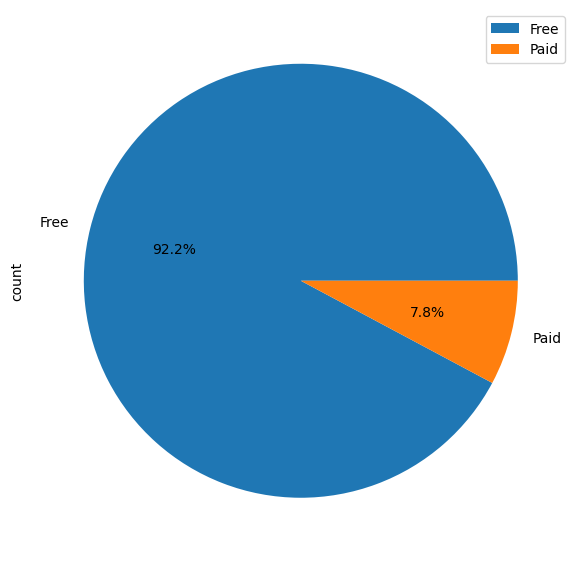

In [161]:

# distribution of type of app in pie chart

psd['Type'].value_counts().plot.pie(figsize = (7,15), autopct='%1.1f%%')
plt.legend()

Hence we can see majority of app type is free

In [162]:
# Selecting only numerical features for correlation analysis.
numerical_features = psd.select_dtypes(include=np.number)

# Calculating correlation for numerical features only.
correlation_matrix = numerical_features.corr()

# Displaying the correlation matrix
print(correlation_matrix)

            Rating   Reviews  Installs     Price
Rating    1.000000  0.050212  0.034306 -0.018674
Reviews   0.050212  1.000000  0.625158 -0.007603
Installs  0.034306  0.625158  1.000000 -0.009412
Price    -0.018674 -0.007603 -0.009412  1.000000


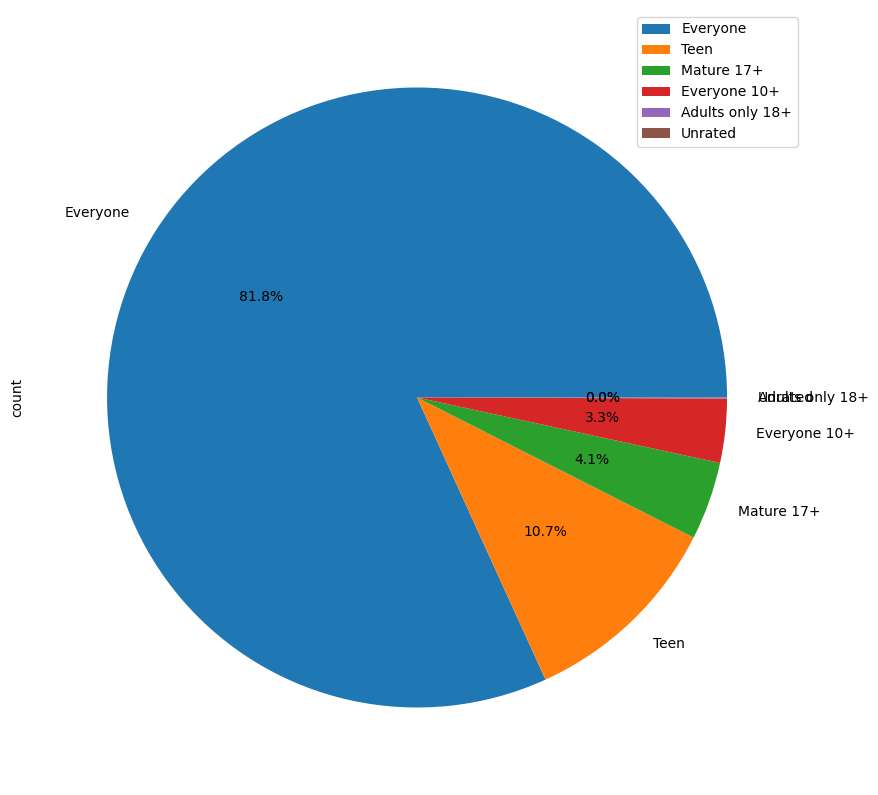

In [163]:
# Content rating of the apps

psd['Content Rating'].value_counts().plot.pie(figsize = (10,18), autopct='%1.1f%%')
plt.legend()

Hence, We can clearly see majority of apps can be used by everyone

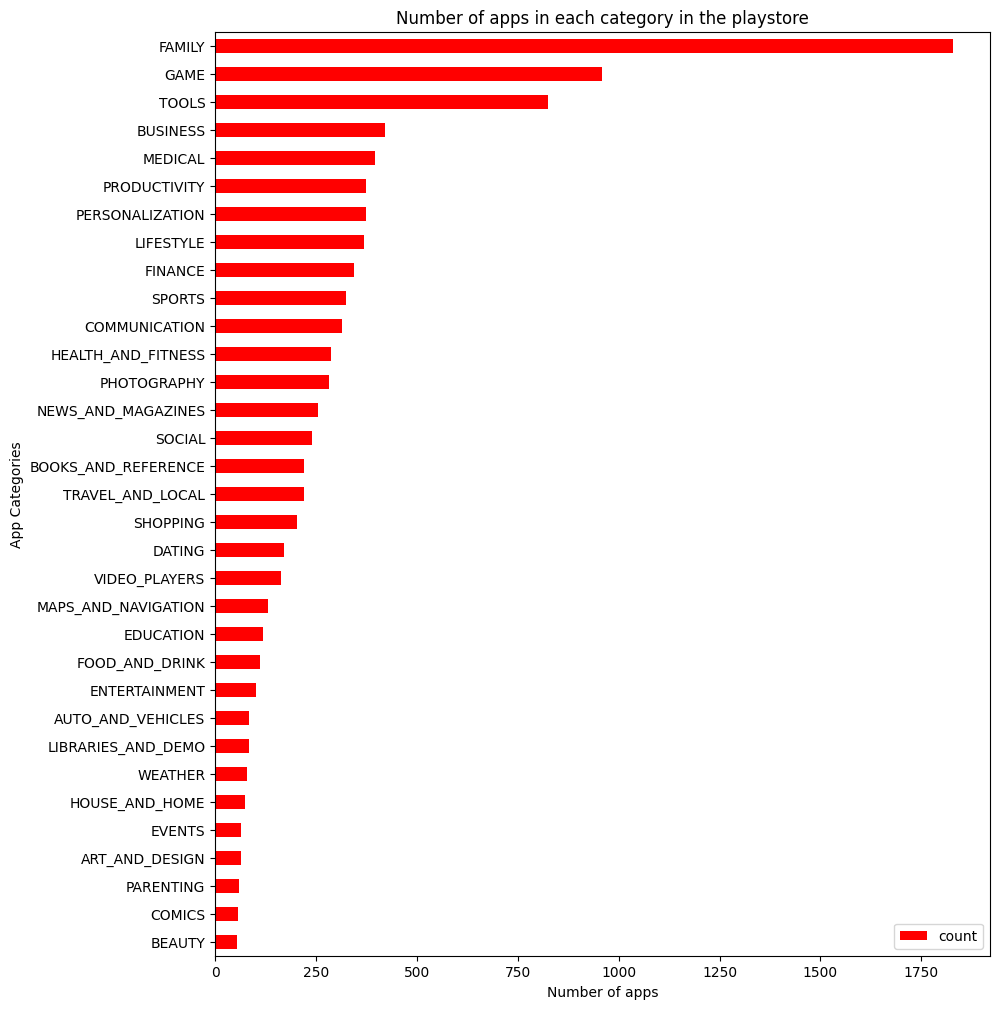

In [164]:
 # No of apps in each category

psd['Category'].value_counts().plot.barh(figsize=(10,12), color = 'r').invert_yaxis()
plt.ylabel('App Categories')
plt.xlabel('Number of apps')
plt.title('Number of apps in each category in the playstore')
plt.legend()

From the plot, it is evident that Family, Game, and Tools category have the maximum number of apps compared to other categories.

Text(0.5, 1.0, 'Total app installs in each category')

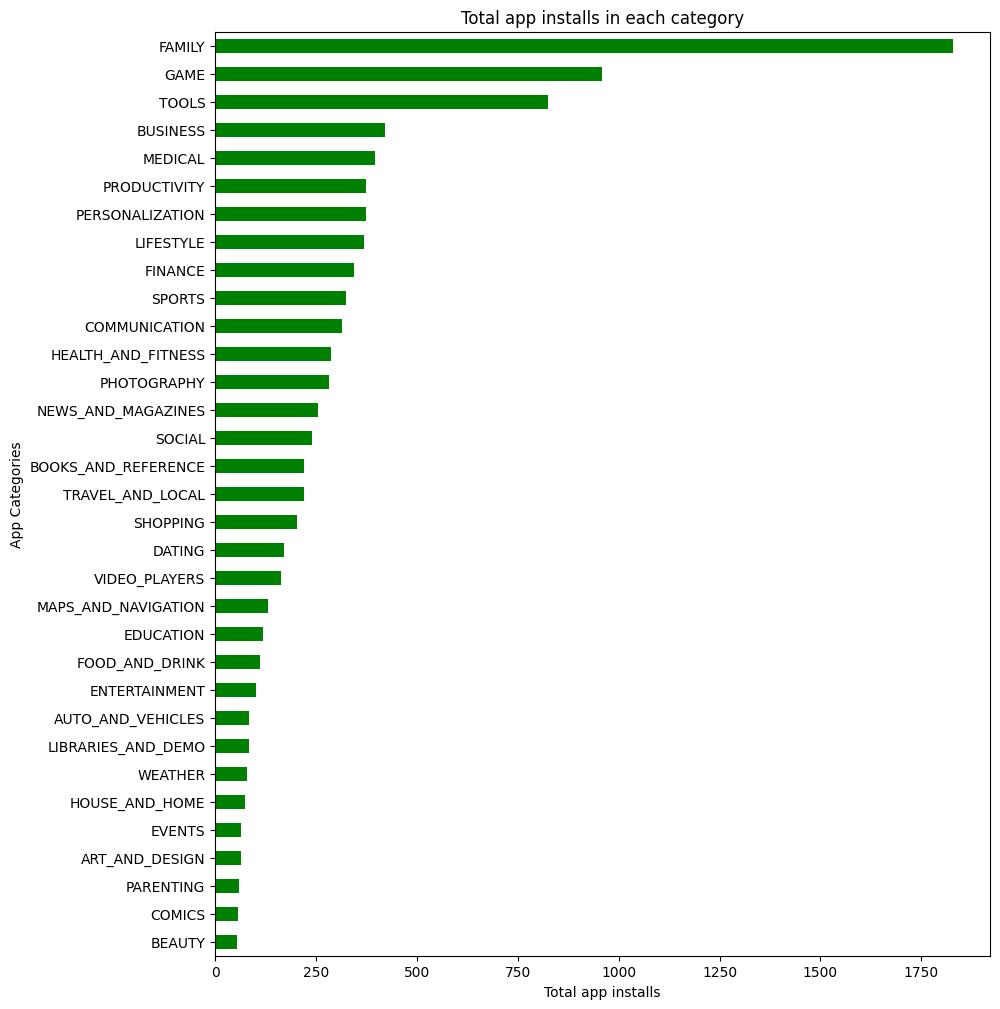

In [165]:
# total app installs in each category

psd['Category'].value_counts().plot.barh(figsize=(10,12), color = 'g').invert_yaxis()
plt.xlabel('Total app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')

This shows us that The Game and Communication categories has the highest number of installs

Text(0.5, 1.0, 'Average number of app installs in each category')

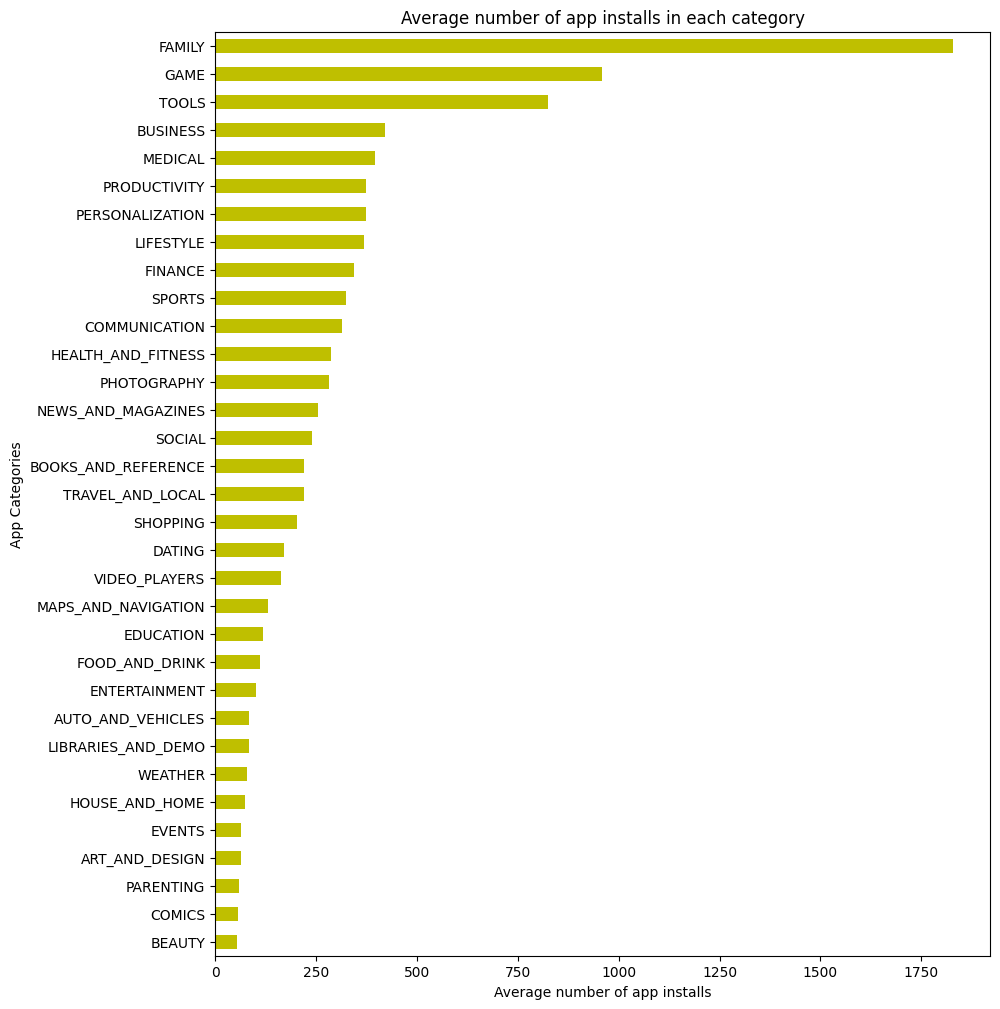

In [166]:
# Average no of apps installs in each category

psd['Category'].value_counts().plot.barh(figsize=(10,12), color = 'y').invert_yaxis()
plt.xlabel('Average number of app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Average number of app installs in each category')

We can clearly see that the apps in the Communication, Video players and Social categories has the highest number of average installs compared to the apps in other categories.

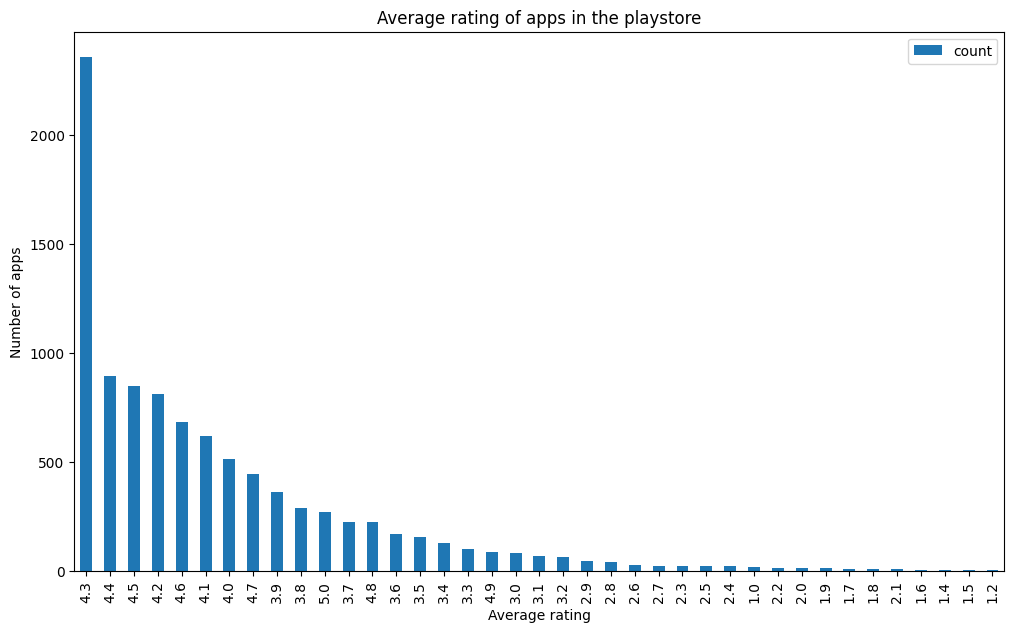

In [167]:
# Average app ratings

psd['Rating'].value_counts().plot.bar(figsize=(12,7) )
plt.xlabel('Average rating')
plt.ylabel('Number of apps')
plt.title('Average rating of apps in the playstore')
plt.legend()

We can clearly see that most of the apps have got an average rating of 4.3 that means most of the apps have a good rating

In [168]:
# Creating a df for only free apps

free_df = psd[psd['Type'] == 'Free']

In [169]:
# Creating a df for top free apps

top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top_free_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
341,Hangouts,COMMUNICATION,4.0,3419249,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
865,Google Play Games,ENTERTAINMENT,4.3,7165362,Varies with device,1000000000,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76.0,1000000000,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up
2544,Facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


In [170]:
top_free_df.shape

(20, 13)

In [171]:
top_free_df['App']

,App
152,Google Play Books
335,Messenger – Text and Video Chat for Free
336,WhatsApp Messenger
338,Google Chrome: Fast & Secure
340,Gmail
341,Hangouts
391,Skype - free IM & video calls
865,Google Play Games
1654,Subway Surfers
2544,Facebook


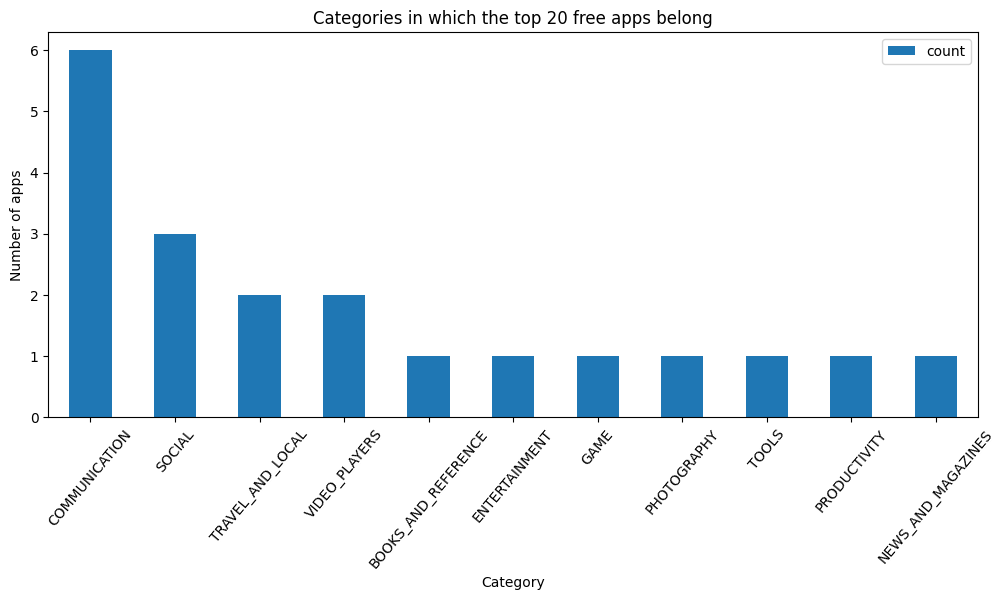

In [172]:
# Categories in which the top 20 free apps belong to

top_free_df['Category'].value_counts().plot.bar(figsize=(12,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Categories in which the top 20 free apps belong')
plt.xticks(rotation=50)
plt.legend()

In [173]:
# Creating a df containing only paid apps

paid_df = psd[psd['Type'] == 'Paid']
paid_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


<Axes: xlabel='Price'>

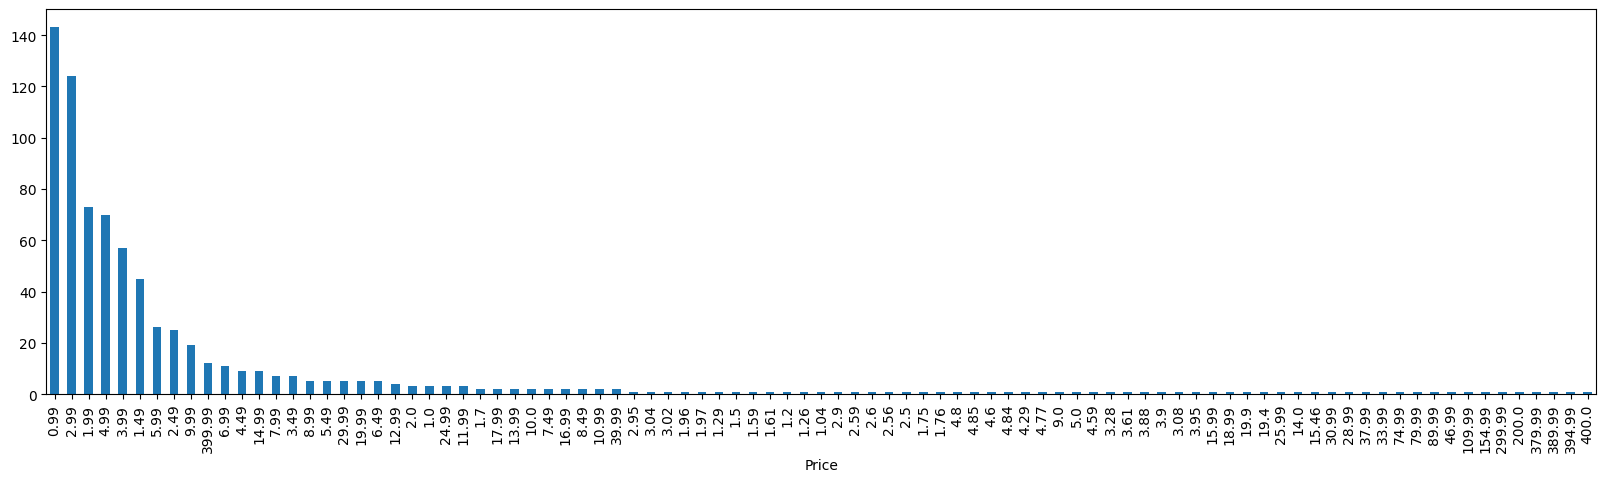

In [174]:
# Number of apps that can be installed at a particular price

paid_df.groupby('Price')['App'].count().sort_values(ascending= False).plot.bar(figsize = (20,5))

In [175]:
# Creatng a new column 'Revenue' in paid_df

paid_df['Revenue'] = ''
paid_df.head()
paid_df=paid_df.loc[paid_df['Installs']=="Free"]
paid_df['Installs']=paid_df['Installs'].astype(str).astype(int)
paid_df['Revenue']=paid_df['Installs']*paid_df['Price']
paid_df.head()


<ipython-input-175-7b5ca5c7561b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_df['Revenue'] = ''


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue


In [176]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue


In [177]:
# Top 20 paid apps in the play store
paid_df['Revenue']=paid_df['Revenue'].astype(str).astype(int)
top_paid_df = paid_df.nlargest(20, 'Revenue')
top_paid_df['App']

,App


In [178]:
# Paid apps with the highest number of installs

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue


Minecraft is the only paid app with more than 10M+ installs.

In [179]:
# ...your existing code before paid_df.head()...

paid_df['Installs'] = paid_df['Installs'].astype(str)  # Convert Installs to string
paid_df.head()
paid_df=paid_df.loc[paid_df['Installs']=="Free"] #filter rows
paid_df['Installs']=paid_df['Installs'].astype(str).astype(int) #convert Installs to int
# ...rest of your code...

It can be seen that apps in Finance,Lifestyle,Style are costly

Text(0.5, 1.0, 'Top 20 apps with the highest number of user reviews')

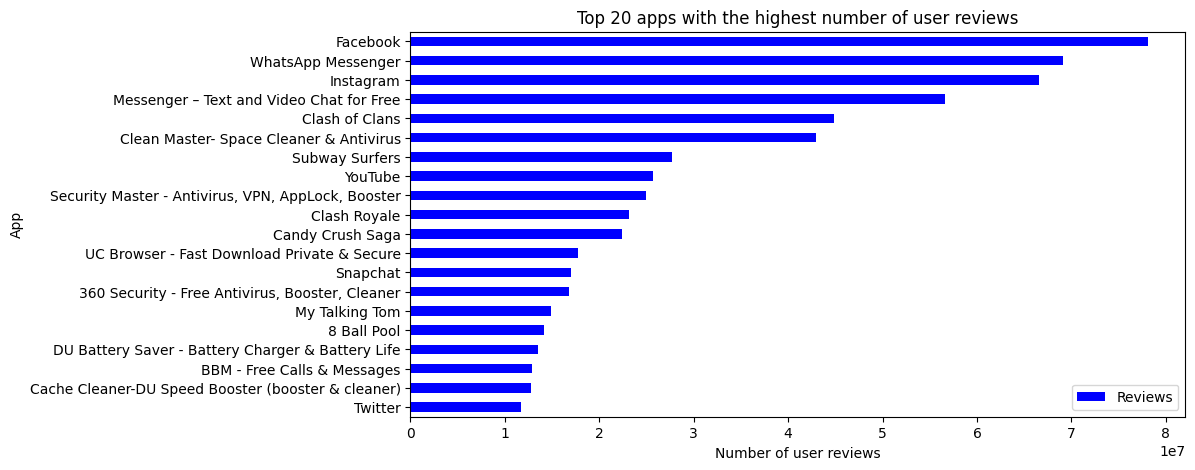

In [180]:
# Top apps with the highest number of user reviews

psd.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,5), color = 'blue').invert_yaxis()
plt.xlabel('Number of user reviews')
plt.title('Top 20 apps with the highest number of user reviews')

Facebook has got the highest number of user reviews

In [181]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = psd[psd['Size'] != 'Varies with device']['Size'].max()

min_size = psd[psd['Size'] != 'Varies with device']['Size'].min()

mean_size = round(psd[psd['Size'] != 'Varies with device']['Size'].mean(),3)

median_size = psd[psd['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.008, np.float64(20.414), np.float64(12.0)]

In [182]:
# Function to group the apps based on its size in MB

def size_group(var):
  '''
  This function groups the size of an app
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

In [183]:
# applying the size_group function in the main df

psd['Size group'] = psd['Size'].apply(lambda x: size_group(x))
psd.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1-10
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up,1-10
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up,10-20
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up,20-30
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,30-40
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up,1-10


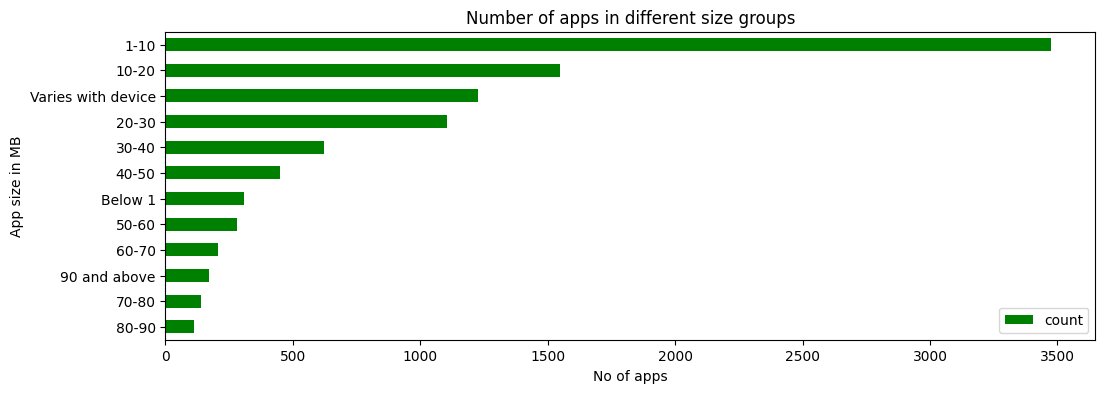

In [184]:
# no of apps belonging to each size group

psd['Size group'].value_counts().plot.barh(figsize=(12,4), color='g').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()

Majority of apps lie in the range from 1 to 20 MB

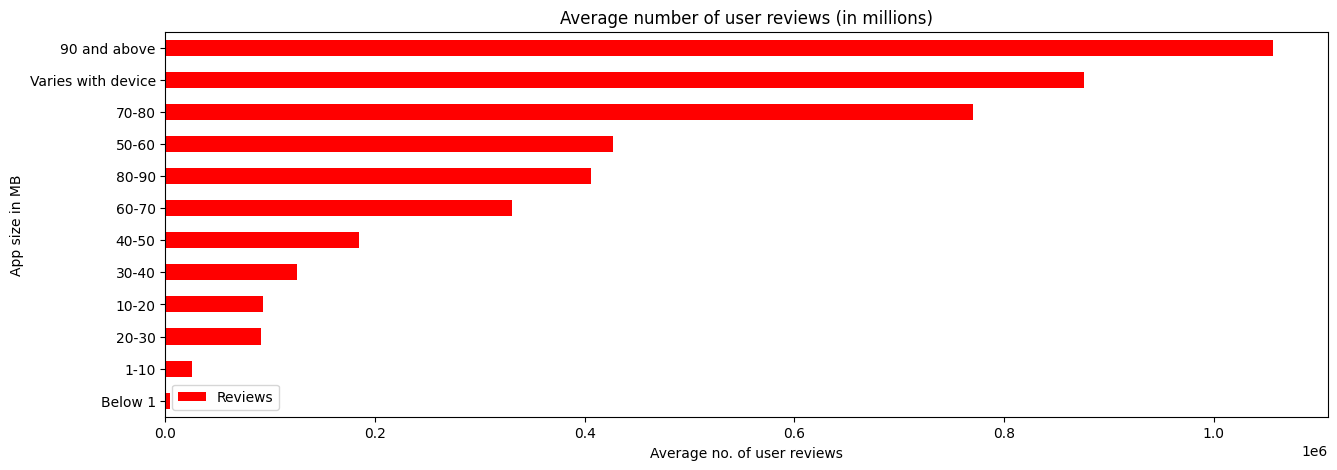

In [185]:
# average no of user reviews in each size group

psd.groupby('Size group')['Reviews'].mean().sort_values().plot.barh(figsize=(15,5), color = 'r')
plt.title("Average number of user reviews (in millions)")
plt.xlabel('Average no. of user reviews')
plt.ylabel('App size in MB')
plt.legend()

Apps having size more than 90MB have highest number of average user reviews

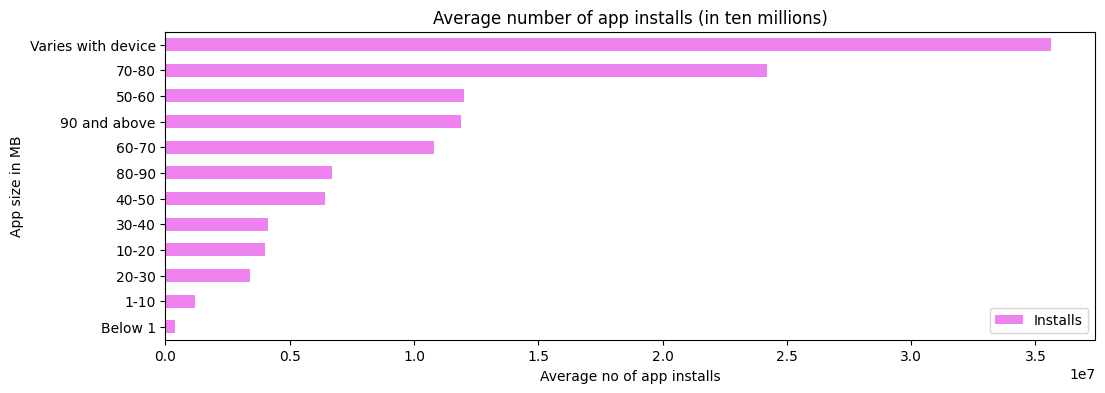

In [186]:
#average number of app installs in each category

psd.groupby('Size group')['Installs'].mean().sort_values().plot.barh(figsize=(12,4), color='violet')
plt.title("Average number of app installs (in ten millions)")
plt.xlabel('Average no of app installs')
plt.ylabel('App size in MB')
plt.legend()

# **Data visualization on User reviews**

In [187]:
ur.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


In [188]:
# Review sentiment for each app

ur.groupby('App')['Sentiment'].value_counts()

App                               Sentiment
10 Best Foods for You             Positive     162
                                  Neutral       22
                                  Negative      10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室  Positive      31
                                  Neutral        8
                                              ... 
Hotwire Hotel & Car Rental App    Neutral       11
                                  Negative       6
Housing-Real Estate & Property    Negative      10
                                  Positive       8
                                  Neutral        3
Name: count, Length: 2376, dtype: int64

In [189]:
# positive reviews

positive_reviews_df = ur[ur['Sentiment'] == 'Positive']
positive_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

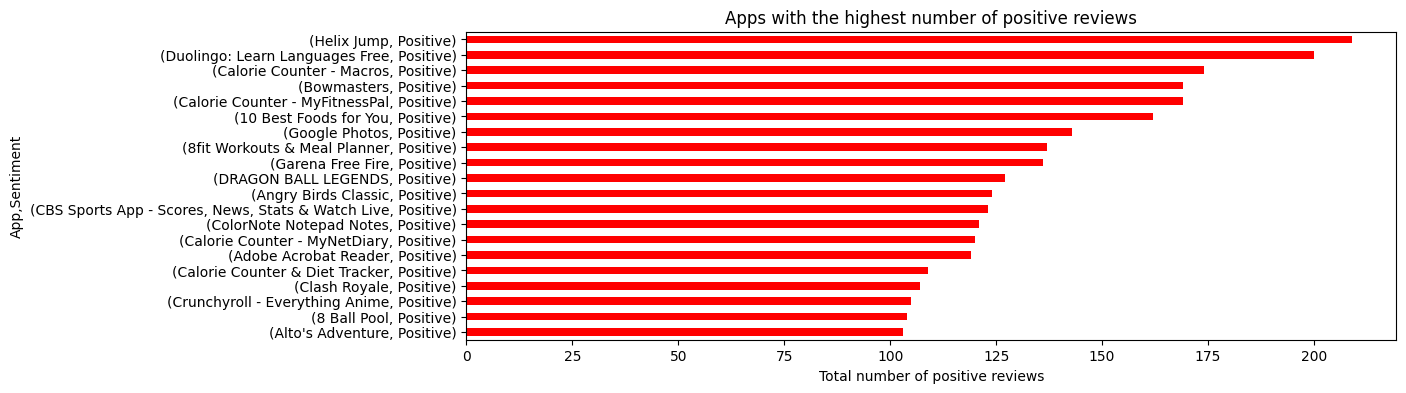

In [190]:
positive_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(12,4), color='r').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

It can be seen that Helix Jump has got the highest positive reviews

In [191]:
# negative reviews

negative_reviews_df = ur[ur['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


In [192]:
# negative reviews

negative_reviews_df = ur[ur['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


It is clear that Angry Birds Classic has got highest negative reviews

In [193]:
# importing the required libraries

from wordcloud import WordCloud, STOPWORDS

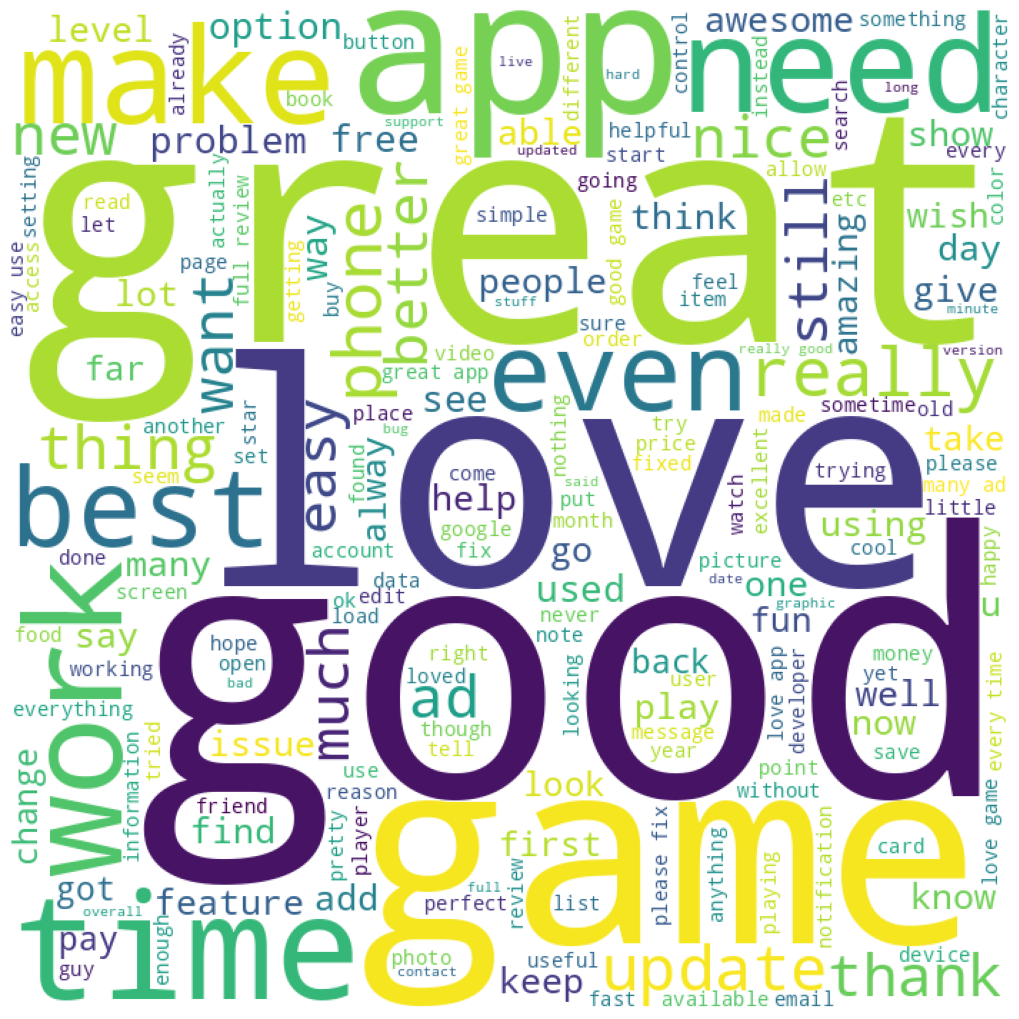

In [194]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in positive_reviews_df.Translated_Review.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

These are some positive reviews words

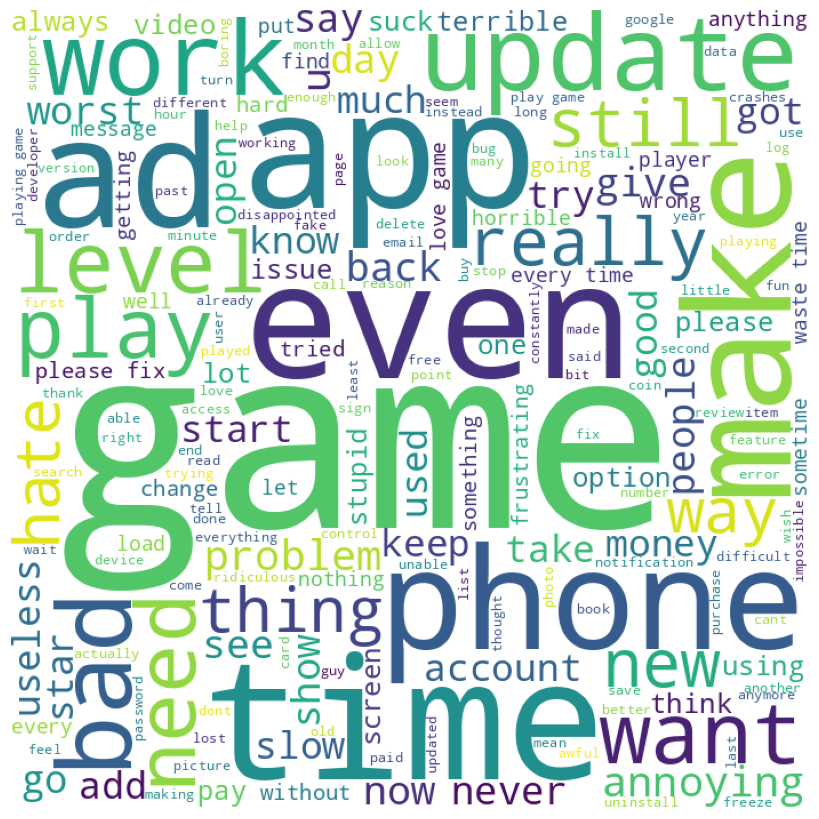

In [195]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in negative_reviews_df.Translated_Review.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

These are some negative reviews words

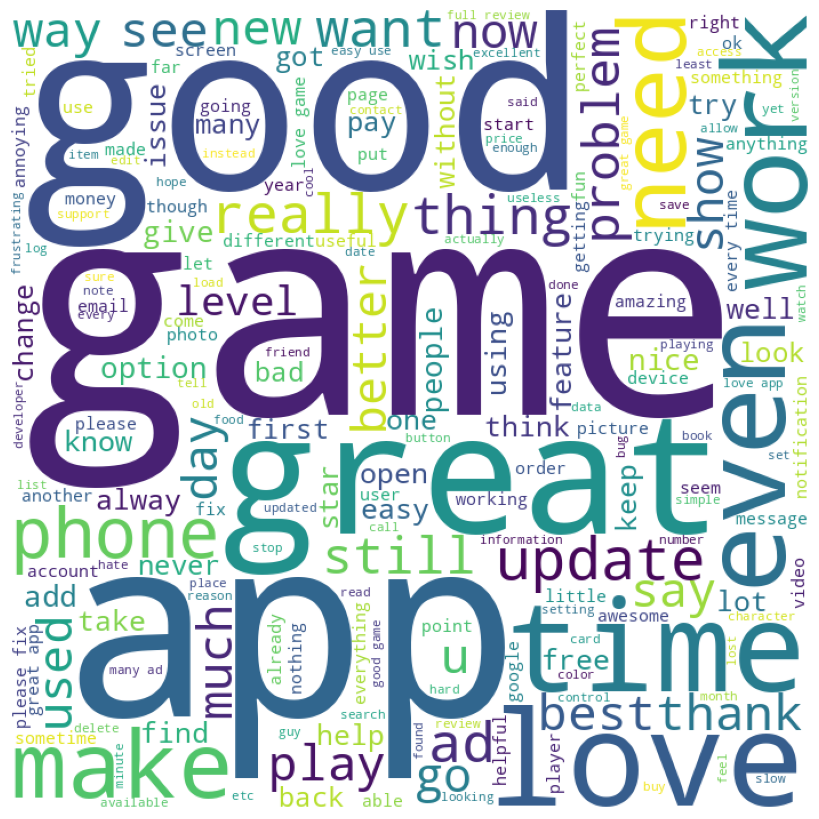

In [196]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in ur.Translated_Review.values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

These are the most common words used by users in reviews

# **Summary**

*   Percentage of free apps = ~92%
*   Percentage of apps with no age restrictions = ~82%

*   Maximum apps in the playstore are from Family category
*   Category with the highest number of installs: Game

*   Category with the highest average app installs: Communicaction
*   There are 20 free apps that have been installed over a billion times

*   Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
*   Category in which the paid apps have the highest average installation fee: Finance

*   Most popular app in the Play Store based on the number of reviews: Facebook
*   The median size of all apps in the play store is 12 MB

*   The apps whose size varies with device has the highest number of average app installs
*   The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest

*   Helix Jump has the highest number of positive reviews
*   Angry Birds Classic has the highest number of negative reviews.















